Running ./global inputs/grafo_3.txt
Execution time: 0.0029 seconds
Output of ./global:

----------------------------------------
Running ./global_omp inputs/grafo_3.txt
Execution time: 0.0166 seconds
Output of ./global_omp:

----------------------------------------
Running mpirun -np 2 ./global_omp_mpi inputs/grafo_3.txt
Execution time: 1.7213 seconds
Output of mpirun -np 2 ./global_omp_mpi:

----------------------------------------
Running ./local inputs/grafo_3.txt
Execution time: 0.0029 seconds
Output of ./local:

----------------------------------------
Running ./local_omp inputs/grafo_3.txt
Execution time: 0.0108 seconds
Output of ./local_omp:

----------------------------------------
Running ./global inputs/grafo_4.txt
Execution time: 0.0023 seconds
Output of ./global:

----------------------------------------
Running ./global_omp inputs/grafo_4.txt
Execution time: 0.0085 seconds
Output of ./global_omp:

----------------------------------------
Running mpirun -np 3 ./global_omp_m

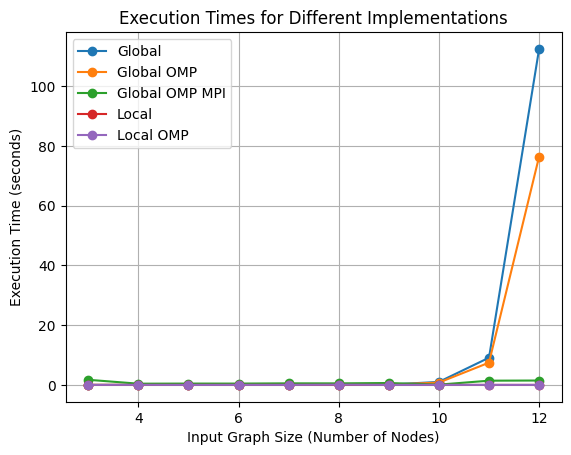

Summary of execution times:
Global: [0.002876758575439453, 0.0022611618041992188, 0.0024421215057373047, 0.002223968505859375, 0.006561279296875, 0.014435291290283203, 0.10446882247924805, 1.0170528888702393, 9.107987642288208, 112.4377052783966]
Global OMP: [0.016566753387451172, 0.008541345596313477, 0.013887643814086914, 0.008931159973144531, 0.013485431671142578, 0.018533945083618164, 0.09613680839538574, 0.7852449417114258, 7.457334995269775, 76.40626192092896]
Global OMP MPI: [1.7212975025177002, 0.41742491722106934, 0.45296788215637207, 0.4499702453613281, 0.5276124477386475, 0.52126145362854, 0.6396286487579346, 0.09775447845458984, 1.421644687652588, 1.4754791259765625]
Local: [0.002903461456298828, 0.002550363540649414, 0.002772808074951172, 0.004079341888427734, 0.002557516098022461, 0.003574848175048828, 0.0028607845306396484, 0.002282381057739258, 0.0022716522216796875, 0.0038192272186279297]
Local OMP: [0.010823965072631836, 0.025409698486328125, 0.002636432647705078, 0.0

In [30]:
import subprocess
import time
import matplotlib.pyplot as plt

# Define the executable files and the input file
executable_labels = [
    "Global",
    "Global OMP",
    "Global OMP MPI",
    "Local",
    "Local OMP",
]

def run_executable(command, input_file):
    start_time = time.time()
    result = subprocess.run(command.split() + [input_file], capture_output=True, text=True)
    end_time = time.time()
    execution_time = end_time - start_time
    
    print(f"Running {' '.join(command.split() + [input_file])}")
    print(f"Execution time: {execution_time:.4f} seconds")
    print(f"Output of {command}:\n{result.stdout}")
    if result.stderr:
        print(f"Errors of {command}:\n{result.stderr}")
    print("-" * 40)  # Separator between runs
    
    return execution_time

# Dictionary to store execution times
execution_times = {label: [] for label in executable_labels}

# Loop through different input files
for i in range(3,13):
    input_file = f"inputs/grafo_{i}.txt"
    u = min(i-1,8)
    executables = [
        "./global",
        "./global_omp",
        f"mpirun -np {i-1} ./global_omp_mpi",
        "./local",
        "./local_omp",
    ]

    # Loop through the executables and run them with the input file
    for label, exe in zip(executable_labels, executables):
        execution_time = run_executable(exe, input_file)
        execution_times[label].append(execution_time)

# Plotting the execution times
for label in executable_labels:
    plt.plot(range(3,13), execution_times[label], label=label, marker='o')

plt.xlabel('Input Graph Size (Number of Nodes)')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Times for Different Implementations')
plt.legend()
plt.grid(True)
plt.savefig('execution_times_plot.png')
plt.show()

# Print summary of execution times
print("Summary of execution times:")
for label in executable_labels:
    print(f"{label}: {execution_times[label]}")
